In [0]:
project_name = 'test_project_1'
#permissions='default'
permissions='fulldata'

In [0]:
%run /Snippets/header_008

PROJECT DETAILS:
Project identifier: test_project_1
Cluster data access level: fulldata


EXECUTION DETAILS:
Spark version: 11.3.x-scala2.12, 
Cluster Node Type: i3.xlarge, 
Driver Node Type: c4.2xlarge, 
Worker Node Type: i3.xlarge


DATA SNAPSHOT DETAILS:
This notebook uses the latest snapshot date for this version: "v008.20240329092717/", (29 March 2024)

 The following are the Scopus snapshot dates available for datasets at v008:
['v008.20220314092239/', 'v008.20220906063204/', 'v008.20221021151538/', 'v008.20230509104116/', 'v008.20230821105000/', 'v008.20231003094404/', 'v008.20240329092717/']
(If you want to use a different snapshot, in the first cell of your notebook, set the variable `custom_snapshot_date` to one of the options listed above (string data type))



DATA SAMPLE DETAILS:
Setting paths to run on full datasets (100% Scopus publication volume)


In [0]:
%pip install markupsafe==2.0.1
%pip install rpy2

Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  ERROR: Command errored out with exit status 1:
   command: /local_disk0/.ephemeral_nfs/envs/pythonEnv-c0a28a8b-65f4-442f-971d-fb82564b6a0a/bin/python /local_disk0/.ephemeral_nfs/envs/pythonEnv-c0a28a8b-65f4-442f-971d-fb82564b6a0a/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py get_requires_for_build_wheel /tmp/tmp6701_igs
       cwd: /tmp/pip-install-iq90p4oq/rpy2_1b0a2b5311dc4387ac839266bd2912ed
  Complete output (16 lines):
  Traceback (most recent call last):
    File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-c0a28a8b-65f4-442f-971d-fb82564b6a0a/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py", line 349, 

In [0]:
import pandas as pd
total = pd.read_csv("/dbfs/FileStore/shared_uploads/arabi2@wisc.edu/us_media_analysis.csv")
print(total.dtypes)

print("len of total ", len(total))
print(total['doi'].nunique())
total = total.drop_duplicates(subset = ['doi'])

print("len of total after dropping duplicate dois ", len(total))

#total['cor_gender'].unique() //array(['female', 'male', 'M', 'F', 'f', 'm'], dtype=object)
ret = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/arabi2@wisc.edu/retrected_doi_wos.csv")
retracted = ret.select('doi').toPandas()
ids_to_remove = retracted['doi']
print(len(total))
total2 = total[~total['doi'].isin(ids_to_remove)]
print(len(total2))
us = total2[total2['country_name'] == 'United States']
print(len(us))
print(len(us[us['news_cnt'] > 0]))
print(len(us[us['news_cnt'] <= 0]))
print(us.dtypes)

Domain_English        object
Field_English         object
SubField_English      object
srcid                  int64
openaccess_status     object
doi                   object
news_cnt               int64
year                   int64
issn                  object
num_au                 int64
cor_gender            object
TopicId                int64
Au1_gender            object
country_name          object
SJR                  float64
subfield_article      object
preferred_name        object
org_type              object
cor_au1                int64
dtype: object
len of total  1014175
1014077
len of total after dropping duplicate dois  1014077
1014077
1014035
1014035
129428
884607
Domain_English        object
Field_English         object
SubField_English      object
srcid                  int64
openaccess_status     object
doi                   object
news_cnt               int64
year                   int64
issn                  object
num_au                 int64
cor_gender            obj

In [0]:
import pandas as pd

df1 = pd.read_csv("/dbfs/FileStore/shared_uploads/arabi2@wisc.edu/sentiment_pred_sh_1.csv")
print(len(df1))
print(df1['doi'].nunique())
print(df1.dtypes)
print(df1['gender'].unique())
df1 = df1.drop(columns=['gender'], axis = 1)
print(df1.dtypes)
print(df1.head(3))


518488
5853
URL            object
doi            object
media          object
gender         object
word_count      int64
sentence       object
sent_len        int64
post_id         int64
negative      float64
neutral       float64
positive      float64
dtype: object
['female' 'male' 'F' 'M' 'm']
URL            object
doi            object
media          object
word_count      int64
sentence       object
sent_len        int64
post_id         int64
negative      float64
neutral       float64
positive      float64
dtype: object
                                                 URL  \
0  https://www.yahoo.com/lifestyle/golf-cart-gail...   
1  https://www.yahoo.com/lifestyle/golf-cart-gail...   
2  https://www.yahoo.com/lifestyle/golf-cart-gail...   

                             doi   media  word_count  \
0  10.1080/19320248.2018.1512931  yahoo!        1332   
1  10.1080/19320248.2018.1512931  yahoo!        1332   
2  10.1080/19320248.2018.1512931  yahoo!        1332   

                  

In [0]:
print(len(df1))
df1 = df1[df1['negative'] != -1]
print(len(df1))

518488
518485


In [0]:
print(len(us))
us = us.drop_duplicates(subset = ['doi'])
print(len(us))
merged = df1.merge(us, on = 'doi', how = 'inner')
print(len(merged))

print(merged['doi'].nunique())
print(merged['cor_gender'].unique())

1014035
1014035
518448
5851
['female' 'male' 'F' 'M' 'm']


In [0]:
dummy = merged.copy()
dummy = dummy.dropna(subset = ['cor_gender','negative','neutral','positive'])
print(len(dummy))
gender = []
for ind in dummy.index:
    if dummy['cor_gender'][ind] == "female" or dummy['cor_gender'][ind] == "f" or dummy['cor_gender'][ind] == "F":
        #gender.append("female") #
        gender.append(1)
    elif dummy['cor_gender'][ind] == "male" or dummy['cor_gender'][ind] == "m" or dummy['cor_gender'][ind] == "M": ##there is no null value in gender, so it is safe to say that if someone is not female, he must be male
        #gender.append("male") #
        gender.append(0)
dummy['gender'] = gender

518448


In [0]:
q = []
q1,q2,q3 = 0.124,0.25,0.597
for ind in dummy.index:
  if dummy['SJR'][ind] <= q1:
    q.append(0)
  elif dummy['SJR'][ind] > q1 and dummy['SJR'][ind] <= q2:
    q.append(1)
  elif dummy['SJR'][ind] > q2 and dummy['SJR'][ind] <= q3:
    q.append(2)
  else:
    q.append(3)
dummy['q'] = q

In [0]:
import numpy as np
import rpy2.robjects.packages as rpackages
import rpy2.robjects.vectors as robjects_vectors


from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

# import R's utility package
#utils = rpackages.importr('utils')
#utils.chooseCRANmirror(ind=1)
from rpy2.robjects.conversion import localconverter
base = importr('base')
from rpy2.robjects import Formula
stats = importr('stats')
nnet = importr('nnet')

### Analysis positive sentiment, log and gaussian reported

Out[15]: <AxesSubplot:>

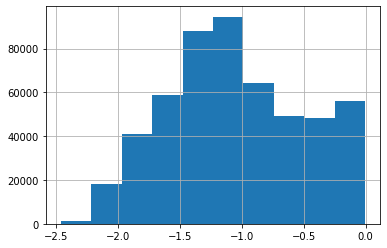

In [0]:
import math
import numpy as np
x = np.log10(dummy['positive'])
x.hist()

In [0]:
tmp = pd.DataFrame()
tmp['positive'] = np.log10(dummy['positive']) #dummy['positive'] #
tmp['gender'] = dummy['gender']
tmp['year'] = dummy['year']
tmp['Domain_English'] = dummy['Domain_English']
tmp['Field_English'] = dummy['Field_English']
tmp['SubField_English'] = dummy['SubField_English']
tmp['q'] = dummy['q']
tmp['post_id'] = dummy['post_id']

tmp = tmp.dropna(subset = ['positive'])

#We get same significance decision for both np.log10 gaussian (identity) and gamma (identity) distribution
#entire data: gaussian (identity) - gmale est = -0.025826, err= 0.001731, p val = < 2e-16 ***, cohen d  -0.0526

#tmp = tmp[tmp['Domain_English'] == 'Applied Sciences'] # est = -0.031015, err= 0.002162, p val = < 2e-16 ***
#tmp = tmp[tmp['Domain_English'] == 'Arts & Humanities'] #est = 0.071248, err = 0.045387, p val = 0.116632
#tmp = tmp[tmp['Domain_English'] == 'Economic & Social Sciences'] #est = 0.003344, err = 0.017528, pval = 0.84868
#tmp = tmp[tmp['Domain_English'] == 'Health Sciences'] #est = -0.030636 , err = 0.003908, p val = 4.59e-15 ***
#tmp = tmp[tmp['Domain_English'] == 'Natural Sciences'] #est = 0.002584, err = 0.004553, pval = 0.570292


with localconverter(ro.default_converter + pandas2ri.converter):
  tst_df = ro.conversion.py2rpy(tmp)

col_2_index = list(tst_df.colnames).index('year')
col_2 = ro.vectors.FactorVector(tst_df.rx2('year'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('q')
col_2 = ro.vectors.FactorVector(tst_df.rx2('q'))
tst_df[col_2_index] = col_2


'''col_2_index = list(tst_df.colnames).index('Domain_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Domain_English'))
tst_df[col_2_index] = col_2'''

col_2_index = list(tst_df.colnames).index('Field_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Field_English'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('gender')
col_2 = ro.vectors.FactorVector(tst_df.rx2('gender'))
tst_df[col_2_index] = col_2



#print(tst_df)
#pandas2ri.activate()
model = stats.glm("positive ~ gender+year+q+Field_English",
                  data=tst_df,family=ro.r('gaussian(link="identity")')) #family=ro.r('gaussian(link="identity")') #family=ro.r('poisson(link="log")') family=ro.r('gaussian')
print(base.summary(model))


Call:
(function (formula, family = gaussian, data, weights, subset, 
    na.action, start = NULL, etastart, mustart, offset, control = list(...), 
    model = TRUE, method = "glm.fit", x = FALSE, y = TRUE, singular.ok = TRUE, 
    contrasts = NULL, ...) 
{
    cal <- match.call()
    if (is.character(family)) 
        family <- get(family, mode = "function", envir = parent.frame())
    if (is.function(family)) 
        family <- family()
    if (is.null(family$family)) {
        print(family)
        stop("'family' not recognized")
    }
    if (missing(data)) 
        data <- environment(formula)
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "etastart", "mustart", "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (identical(method, "model.frame")) 
        return(mf)
    if (!is.character(method

In [0]:
import numpy as np
def cohend(d,outcome, val, domain):
    data = d[d['Domain_English'] == domain]
    #data = d.copy(deep = True)
    print("len of data ",len(data))
    grp1 = data[data[outcome] == 1]
    grp0 = data[data[outcome] == 0]

    n0,n1 = len(grp0),len(grp1)
    m0, m1 = grp0[val].mean(), grp1[val].mean()

    s0,s1 = grp0[val].std(), grp1[val].std()

    print("n0 ",n0," n1 ",n1, " m0 ",m0," m1 ",m1, " s0 ",s0," s1 ",s1)

    spooled1 = np.sqrt(((s0*s0)+(s1*s1))/2)
    print("cohen d ", (m1 - m0)/spooled1)

    spooled2 = (((n0 - 1) * s0 * s0) + ((n1 - 1) * s1 * s1))/(n0 + n1 - 2)
    spooled2 = np.sqrt(spooled2)
    print("cohen d ", (m1 - m0)/spooled2)

#cohend(dummy.copy(deep = True), 'gender','positive','Applied Sciences') #-0.0785

#cohend(dummy.copy(deep = True), 'gender','positive','Arts & Humanities') #-0.0665

#cohend(dummy.copy(deep = True), 'gender','positive','Economic & Social Sciences') #-0.1034

#cohend(dummy.copy(deep = True), 'gender','positive','Natural Sciences') #-0.022

#cohend(dummy.copy(deep = True), 'gender','positive','Health Sciences') #-0.0315

#cohend(dummy.copy(deep = True), 'gender','positive','Entire') #-0.05262

len of data  105907
n0  79588  n1  26319  m0  0.15178197870787133  m1  0.14521511924491332  s0  0.20788760764082634  s1  0.20800066339438777
cohen d  -0.031579920270285736
cohen d  -0.03158423918032558


### Neutral sentiment, Gamma reported

Out[14]: <AxesSubplot:>

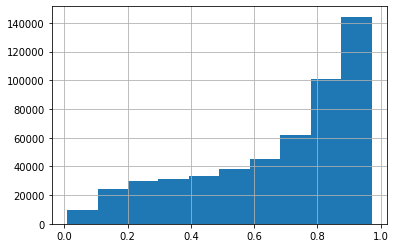

In [0]:
x = dummy.copy(deep = True)
mean = x['neutral'].mean()
std = x['neutral'].std() 
minn = x['neutral'].min()
maxx = x['neutral'].max()

x['pow'] = x['neutral'].apply(lambda x: (x - mean)/(std))

#x['pow'] = x['neutral'].apply(lambda x: (x - minn)/(maxx - minn))
#x['pow'] = x['neutral'].apply(lambda x: x**13)
x['neutral'].hist()
#np.log2(dummy['neutral']).hist()

In [0]:
dummy['neutral'].min()

Out[15]: 0.0084811151027679

In [0]:
tmp = pd.DataFrame()
tmp['neutral'] = dummy['neutral']
tmp['gender'] = dummy['gender']
tmp['year'] = dummy['year']
tmp['Domain_English'] = dummy['Domain_English']
tmp['Field_English'] = dummy['Field_English']
tmp['SubField_English'] = dummy['SubField_English']
tmp['q'] = dummy['q']
tmp['post_id'] = dummy['post_id']

tmp = tmp.dropna(subset = ['neutral'])

#gamma log gives same significance
#entire data: gamme (identity) - gmale est = -0.0030714, err = 0.0008104, p val = 0.000151 ***

#tmp = tmp[tmp['Domain_English'] == 'Applied Sciences'] #est = -0.0016219, err = 0.0010148, p val = 0.11
#tmp = tmp[tmp['Domain_English'] == 'Arts & Humanities'] #est = 0.12938, err = 0.02247, p val = 9.95e-09 ***
#tmp = tmp[tmp['Domain_English'] == 'Economic & Social Sciences'] #est = -0.024566, err = 0.008184, p val = 0.00269 ** 
#tmp = tmp[tmp['Domain_English'] == 'Health Sciences'] #gmale = -0.007207, err = 0.001783, p val = 5.30e-05 ***
#tmp = tmp[tmp['Domain_English'] == 'Natural Sciences'] #est = -0.004162, err = 0.002182,p val = 0.05644 .


with localconverter(ro.default_converter + pandas2ri.converter):
  tst_df = ro.conversion.py2rpy(tmp)

col_2_index = list(tst_df.colnames).index('year')
col_2 = ro.vectors.FactorVector(tst_df.rx2('year'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('q')
col_2 = ro.vectors.FactorVector(tst_df.rx2('q'))
tst_df[col_2_index] = col_2


'''col_2_index = list(tst_df.colnames).index('Domain_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Domain_English'))
tst_df[col_2_index] = col_2'''

col_2_index = list(tst_df.colnames).index('Field_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Field_English'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('gender')
col_2 = ro.vectors.FactorVector(tst_df.rx2('gender'))
tst_df[col_2_index] = col_2

'''col_2_index = list(tst_df.colnames).index('post_id')
col_2 = ro.vectors.FactorVector(tst_df.rx2('post_id'))
tst_df[col_2_index] = col_2'''



#print(tst_df)
#pandas2ri.activate()
model = stats.glm("neutral ~ gender+year+q+Field_English",
                  data=tst_df,family=ro.r('Gamma(link="identity")')) #family=ro.r('gaussian(link="identity")') #family=ro.r('poisson(link="log")') family=ro.r('gaussian')
print(base.summary(model))


Call:
(function (formula, family = gaussian, data, weights, subset, 
    na.action, start = NULL, etastart, mustart, offset, control = list(...), 
    model = TRUE, method = "glm.fit", x = FALSE, y = TRUE, singular.ok = TRUE, 
    contrasts = NULL, ...) 
{
    cal <- match.call()
    if (is.character(family)) 
        family <- get(family, mode = "function", envir = parent.frame())
    if (is.function(family)) 
        family <- family()
    if (is.null(family$family)) {
        print(family)
        stop("'family' not recognized")
    }
    if (missing(data)) 
        data <- environment(formula)
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "etastart", "mustart", "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (identical(method, "model.frame")) 
        return(mf)
    if (!is.character(method

In [0]:
a = stats.confint_default(model)
print(a)

                                         2.5 %      97.5 %
(Intercept)                         0.05122278  0.31219795
gender1                             0.08533226  0.17342292
year2019                           -0.02186547  0.07145754
year2020                           -0.09949164  0.01892324
year2021                           -0.17098012 -0.06164180
q2                                  0.30830151  0.69446096
q3                                  0.25924282  0.43208111
Field_EnglishHistorical Studies     0.12337415  0.22190936
Field_EnglishPhilosophy & Theology  0.07588085  0.22119534



In [0]:
import numpy as np
def cohend(d,outcome, val, domain):
    data = d[d['Domain_English'] == domain]
    #data = d.copy(deep = True)
    print("len of data ",len(data))
    grp1 = data[data[outcome] == 1]
    grp0 = data[data[outcome] == 0]

    n0,n1 = len(grp0),len(grp1)
    m0, m1 = grp0[val].mean(), grp1[val].mean()

    s0,s1 = grp0[val].std(), grp1[val].std()

    print("n0 ",n0," n1 ",n1, " m0 ",m0," m1 ",m1, " s0 ",s0," s1 ",s1)

    spooled1 = np.sqrt(((s0*s0)+(s1*s1))/2)
    print("cohen d ", (m1 - m0)/spooled1)

    spooled2 = (((n0 - 1) * s0 * s0) + ((n1 - 1) * s1 * s1))/(n0 + n1 - 2)
    spooled2 = np.sqrt(spooled2)
    print("cohen d ", (m1 - m0)/spooled2)

#cohend(dummy.copy(deep = True), 'gender','neutral','Applied Sciences') #-0.00746

#cohend(dummy.copy(deep = True), 'gender','neutral','Arts & Humanities') #0.6285

#cohend(dummy.copy(deep = True), 'gender','neutral','Economic & Social Sciences') #-0.0606

#cohend(dummy.copy(deep = True), 'gender','neutral','Natural Sciences') #-0.020

#cohend(dummy.copy(deep = True), 'gender','neutral','Health Sciences') #-0.0496

#cohend(dummy.copy(deep = True), 'gender','neutral','Entire') #-0.017

len of data  518448
n0  384298  n1  134150  m0  0.6718171310809171  m1  0.6675077502111108  s0  0.25021470851393124  s1  0.2519021045343463
cohen d  -0.017164756981870737
cohen d  -0.017192656478325


### Negative sentiment, Gamma reported

Out[15]: <AxesSubplot:>

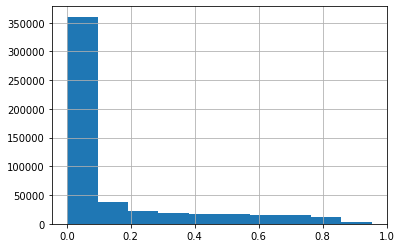

In [0]:
dummy['negative'].hist()

Out[19]: <AxesSubplot:>

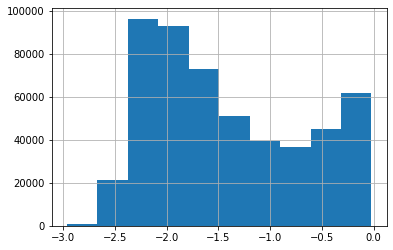

In [0]:
np.log10(dummy['negative']).hist()

In [0]:
dummy['negative'].min()

Out[22]: 0.0010862578637897

In [0]:
tmp = pd.DataFrame()
tmp['negative'] = dummy['negative'] #np.log10(dummy['negative'])
tmp['gender'] = dummy['gender']
tmp['year'] = dummy['year']
tmp['Domain_English'] = dummy['Domain_English']
tmp['Field_English'] = dummy['Field_English']
tmp['SubField_English'] = dummy['SubField_English']
tmp['q'] = dummy['q']
tmp['post_id'] = dummy['post_id']

tmp = tmp.dropna(subset = ['negative'])

#other then Natural science, we get same trend and significance for np.log10 gaussian (identity) and gamma (identity)

#gamma log gives same significance result
#entire data: gamme (identity) - est = 0.0116516, err = 0.0007131, p val = < 2e-16 ***
tmp = tmp[tmp['Domain_English'] == 'Applied Sciences'] #gmale est = 0.0130674, err = 0.0008751, p val = < 2e-16 ***
#tmp = tmp[tmp['Domain_English'] == 'Arts & Humanities'] #gmale est = -0.037791, err = 0.014710, p val = 0.010275 *
#tmp = tmp[tmp['Domain_English'] == 'Economic & Social Sciences'] #est = -0.004829, err = 0.007520, p val = 0.521
#tmp = tmp[tmp['Domain_English'] == 'Health Sciences'] #gmale = 0.013117, err = 0.001813, p val = 4.65e-13 ***
#tmp = tmp[tmp['Domain_English'] == 'Natural Sciences'] #for gamma, est = 0.006651, err = 0.001873, p val = 0.000385 ***


with localconverter(ro.default_converter + pandas2ri.converter):
  tst_df = ro.conversion.py2rpy(tmp)

col_2_index = list(tst_df.colnames).index('year')
col_2 = ro.vectors.FactorVector(tst_df.rx2('year'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('q')
col_2 = ro.vectors.FactorVector(tst_df.rx2('q'))
tst_df[col_2_index] = col_2


'''col_2_index = list(tst_df.colnames).index('Domain_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Domain_English'))
tst_df[col_2_index] = col_2'''

col_2_index = list(tst_df.colnames).index('Field_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Field_English'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('gender')
col_2 = ro.vectors.FactorVector(tst_df.rx2('gender'))
tst_df[col_2_index] = col_2



#print(tst_df)
#pandas2ri.activate()
model = stats.glm("negative ~ gender+year+q+Field_English",
                  data=tst_df,family=ro.r('Gamma(link="identity")')) #family=ro.r('gaussian(link="identity")') #family=ro.r('poisson(link="log")') family=ro.r('gaussian')
print(base.summary(model))


Call:
(function (formula, family = gaussian, data, weights, subset, 
    na.action, start = NULL, etastart, mustart, offset, control = list(...), 
    model = TRUE, method = "glm.fit", x = FALSE, y = TRUE, singular.ok = TRUE, 
    contrasts = NULL, ...) 
{
    cal <- match.call()
    if (is.character(family)) 
        family <- get(family, mode = "function", envir = parent.frame())
    if (is.function(family)) 
        family <- family()
    if (is.null(family$family)) {
        print(family)
        stop("'family' not recognized")
    }
    if (missing(data)) 
        data <- environment(formula)
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "etastart", "mustart", "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (identical(method, "model.frame")) 
        return(mf)
    if (!is.character(method

In [0]:
import numpy as np
def cohend(d,outcome, val, domain):
    data = d[d['Domain_English'] == domain]
    #data = d.copy(deep = True)
    print(data['Domain_English'].unique())
    
    print("len of data ",len(data))
    grp1 = data[data[outcome] == 1]
    grp0 = data[data[outcome] == 0]

    n0,n1 = len(grp0),len(grp1)
    m0, m1 = grp0[val].mean(), grp1[val].mean()

    s0,s1 = grp0[val].std(), grp1[val].std()

    print("n0 ",n0," n1 ",n1, " m0 ",m0," m1 ",m1, " s0 ",s0," s1 ",s1)

    spooled1 = np.sqrt(((s0*s0)+(s1*s1))/2)
    print("cohen d ", (m1 - m0)/spooled1)

    spooled2 = (((n0 - 1) * s0 * s0) + ((n1 - 1) * s1 * s1))/(n0 + n1 - 2)
    spooled2 = np.sqrt(spooled2)
    print("cohen d ", (m1 - m0)/spooled2)

#cohend(dummy.copy(deep = True), 'gender','negative','Applied Sciences') #0.09606

#cohend(dummy.copy(deep = True), 'gender','negative','Arts & Humanities') #-0.609

#cohend(dummy.copy(deep = True), 'gender','negative','Economic & Social Sciences') #0.134

#cohend(dummy.copy(deep = True), 'gender','negative','Natural Sciences') #0.0419

cohend(dummy.copy(deep = True), 'gender','negative','Health Sciences') #0.077

#cohend(dummy.copy(deep = True), 'gender','negative','Entire') #0.07255

['Health Sciences']
len of data  105907
n0  79588  n1  26319  m0  0.1650778217242227  m1  0.18399115828541204  s0  0.2367783394596297  s1  0.2512345088467516
cohen d  0.07747764805110557
cohen d  0.07865744777676699


### Aggregated sentiment regrression, Gaussian reported

In [0]:
x = []
for ind in dummy.index:
    x.append(dummy['positive'][ind] - dummy['negative'][ind])
dummy['sum1'] = x
y = dummy['post_id'].unique()
sum2 = []

for j in y:
    yy = dummy[dummy['post_id'] == j]
    sum2.append(yy['sum1'].sum())


In [0]:
newdf = pd.DataFrame()
newdf['pid'] = y
newdf['sum2'] = sum2

print(dummy['post_id'].nunique())
print(len(newdf))
print(newdf['pid'].nunique())

final = dummy.merge(newdf, left_on = 'post_id', right_on='pid', how = 'inner')

print(len(dummy))
print(len(final))

24251
24251
24251
518448
518448


In [0]:
final['sum2'] = final['sum2']/final['sent_len']
print(final.head(44))

                                                  URL  \
0   https://www.yahoo.com/lifestyle/golf-cart-gail...   
1   https://www.yahoo.com/lifestyle/golf-cart-gail...   
2   https://www.yahoo.com/lifestyle/golf-cart-gail...   
3   https://www.yahoo.com/lifestyle/golf-cart-gail...   
4   https://www.yahoo.com/lifestyle/golf-cart-gail...   
5   https://www.yahoo.com/lifestyle/golf-cart-gail...   
6   https://www.yahoo.com/lifestyle/golf-cart-gail...   
7   https://www.yahoo.com/lifestyle/golf-cart-gail...   
8   https://www.yahoo.com/lifestyle/golf-cart-gail...   
9   https://www.yahoo.com/lifestyle/golf-cart-gail...   
10  https://www.yahoo.com/lifestyle/golf-cart-gail...   
11  https://www.yahoo.com/lifestyle/golf-cart-gail...   
12  https://www.yahoo.com/lifestyle/golf-cart-gail...   
13  https://www.yahoo.com/lifestyle/golf-cart-gail...   
14  https://www.yahoo.com/lifestyle/golf-cart-gail...   
15  https://www.yahoo.com/lifestyle/golf-cart-gail...   
16  https://www.yahoo.com/lifes

In [0]:
final2 = final.drop_duplicates(subset = ['post_id'])
print(final2.head(10))

                                                   URL  \
0    https://www.yahoo.com/lifestyle/golf-cart-gail...   
43   https://www.newscientist.com/article/2184541-h...   
56   https://www.eurekalert.org/pub_releases/2018-1...   
82   https://www.foxnews.com/science/bioreactor-hel...   
103  https://phys.org/news/2018-11-bioreactor-devic...   
126  https://www.breitbart.com/news/scientists-desi...   
139  https://www.upi.com/Science_News/2018/11/07/Sc...   
150  https://www.eurekalert.org/pub_releases/2018-1...   
171  https://www.biospace.com/article/a-modern-fran...   
200  http://www.nbcnews.com/mach/science/robotic-sk...   

                               doi                 media  word_count  \
0    10.1080/19320248.2018.1512931                yahoo!        1332   
43    10.1016/j.celrep.2018.10.010          newscientist         309   
56    10.1016/j.celrep.2018.10.010           eurekalert!         716   
82    10.1016/j.celrep.2018.10.010               foxnews         554   
1

Out[42]: <AxesSubplot:>

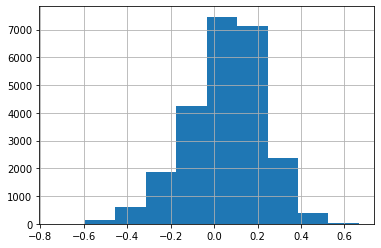

In [0]:
final2['sum2'].hist()

In [0]:
tmp = pd.DataFrame()
tmp['sum2'] = final2['sum2']
tmp['gender'] = final2['gender']
tmp['year'] = final2['year']
tmp['Domain_English'] = final2['Domain_English']
tmp['Field_English'] = final2['Field_English']
tmp['SubField_English'] = final2['SubField_English']
tmp['q'] = final2['q']
tmp['post_id'] = final2['post_id']

tmp = tmp.dropna(subset = ['sum2'])


#entire data: gaussian (identity) - est = -0.0102529, err = 0.0023585, p val = 1.38e-05 ***

#tmp = tmp[tmp['Domain_English'] == 'Applied Sciences'] #est = -0.014782, err = 0.002889, p val = 3.14e-07 ***
#tmp = tmp[tmp['Domain_English'] == 'Arts & Humanities'] #est = 0.05157, err = 0.04138, p val = 0.21
#tmp = tmp[tmp['Domain_English'] == 'Economic & Social Sciences'] #est = 0.02475, err = 0.02889, p val = 0.39
#tmp = tmp[tmp['Domain_English'] == 'Health Sciences'] #est = -0.0085145, err = 0.0057174, p val = 0.13
tmp = tmp[tmp['Domain_English'] == 'Natural Sciences'] #est =  -0.001116, err = 0.005843, p val = 0.84

print(tmp['Domain_English'].unique())

with localconverter(ro.default_converter + pandas2ri.converter):
  tst_df = ro.conversion.py2rpy(tmp)

col_2_index = list(tst_df.colnames).index('year')
col_2 = ro.vectors.FactorVector(tst_df.rx2('year'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('q')
col_2 = ro.vectors.FactorVector(tst_df.rx2('q'))
tst_df[col_2_index] = col_2


'''col_2_index = list(tst_df.colnames).index('Domain_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Domain_English'))
tst_df[col_2_index] = col_2'''

col_2_index = list(tst_df.colnames).index('Field_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Field_English'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('gender')
col_2 = ro.vectors.FactorVector(tst_df.rx2('gender'))
tst_df[col_2_index] = col_2



#print(tst_df)
#pandas2ri.activate()
model = stats.glm("sum2 ~ gender+year+q+Field_English",
                  data=tst_df,family=ro.r('gaussian(link="identity")')) #family=ro.r('gaussian(link="identity")') #family=ro.r('poisson(link="log")') family=ro.r('gaussian')
print(base.summary(model))

['Natural Sciences']

Call:
(function (formula, family = gaussian, data, weights, subset, 
    na.action, start = NULL, etastart, mustart, offset, control = list(...), 
    model = TRUE, method = "glm.fit", x = FALSE, y = TRUE, singular.ok = TRUE, 
    contrasts = NULL, ...) 
{
    cal <- match.call()
    if (is.character(family)) 
        family <- get(family, mode = "function", envir = parent.frame())
    if (is.function(family)) 
        family <- family()
    if (is.null(family$family)) {
        print(family)
        stop("'family' not recognized")
    }
    if (missing(data)) 
        data <- environment(formula)
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "etastart", "mustart", "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (identical(method, "model.frame")) 
        return(mf)
    if 

In [0]:
len(final2)

Out[88]: 24251

In [0]:
#https://link.springer.com/article/10.1007/s00521-022-07403-1